<h1 style="font-size: 64px">Personal project about ANIME!!!</h1>

<h2 style="font-size: 48px">Importing modules</h2>

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
stop = stopwords.words('english')

In [2]:
#%matplotlib notebook

# Load data

In [3]:
df_general = pd.read_csv("Anime_general.csv")
df_general["Description"].fillna("", inplace=True)
df_general.drop(["Producers", "Licensors"], axis="columns", inplace=True)

In [4]:
for column in df_general.columns:
    df_general[column] = df_general[column].apply(lambda x: x if x != "add some" else np.NaN)
df_general["Score"] = df_general["Score"].apply(lambda x: x if x != "(scored by - users)" else np.NaN)

In [5]:
df_general.head(3)

,Aired,Broadcast,Demographics,Description,Duration,English,Episodes,Favorites,French,Genres,...,Rating,Score,Source,Spanish,Status,Studios,Synonyms,Themes,Title,Type
0,"Oct 11, 2022 to ?",Tuesdays at 00:00 (JST),Shounen,Substitute Soul Reaper Ichigo Kurosaki spends ...,24 min. per ep.,Bleach: Thousand-Year Blood War,13,10841,NaN,"Action, Adventure, Fantasy",...,R - 17+ (violence & profanity),77356,Manga,NaN,Currently Airing,Pierrot,Bleach: Thousand-Year Blood War Arc,NaN,Bleach: Sennen Kessen-hen,TV
1,"Jan 6, 2017",NaN,NaN,After helping revive the legendary vampire Kis...,1 hr. 23 min.,Kizumonogatari Part 3: Cold-Blooded,1,7038,Kizumonogatari Partie 3: Sang Glacial,"Action, Mystery, Supernatural",...,R - 17+ (violence & profanity),245056,Light novel,NaN,Finished Airing,Shaft,Koyomi Vamp,Vampire,Kizumonogatari III: Reiketsu-hen,Movie
2,"Dec 7, 2020 to Mar 29, 2021",Mondays at 00:10 (JST),Shounen,Gabi Braun and Falco Grice have been training ...,23 min. per ep.,Attack on Titan: The Final Season,16,50452,L'Attaque des Titans Saison Finale,"Action, Drama",...,R - 17+ (violence & profanity),1135023,Manga,Ataque a los Titanes Temporada Final,Finished Airing,MAPPA,"Shingeki no Kyojin Season 4, Attack on Titan S...","Gore, Military, Survival",Shingeki no Kyojin: The Final Season,TV


### Check amount of NaNs

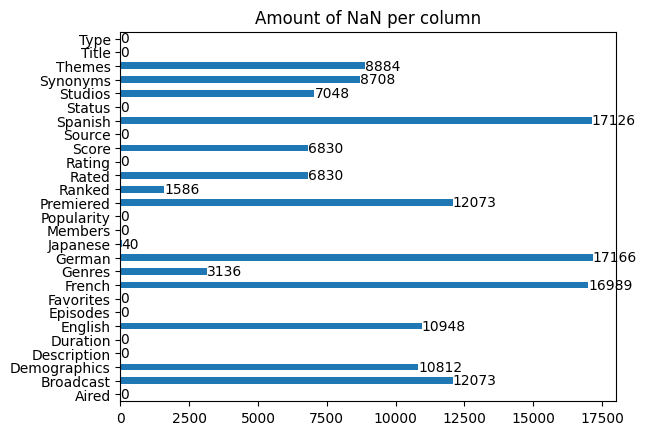

In [6]:
ax = pd.DataFrame([df_general[i].isnull().value_counts() for i in df_general.columns])[True].plot(kind="barh", title="Amount of NaN per column");
ax.bar_label(ax.containers[0]);

# Data enrichment

Firstly enrich data that is relativly easy to enrich                 
Then analyze what kind if data is left for enrichment. Based on this information think of solution

In [7]:
df_general["Broadcast"].fillna("One time release", inplace=True)
df_general["Synonyms"].fillna(df_general["Title"], inplace=True)
#Rename by other languages
df_general["Spanish"].fillna("No Spanish", inplace=True)
df_general["Japanese"].fillna("No Japanese", inplace=True)
df_general["German"].fillna("No German", inplace=True)
df_general["French"].fillna("No French", inplace=True)
df_general["English"].fillna("No English", inplace=True)

In [8]:
df_general["Broadcast"]

0        Tuesdays at 00:00 (JST)
1               One time release
2         Mondays at 00:10 (JST)
3         Mondays at 23:00 (JST)
4         Mondays at 01:35 (JST)
                  ...           
19126           One time release
19127           One time release
19128           One time release
19129           One time release
19130           One time release
Name: Broadcast, Length: 19131, dtype: object

In [9]:
df_general[["Aired", "Premiered"]]

,Aired,Premiered
0,"Oct 11, 2022 to ?",Fall 2022
1,"Jan 6, 2017",NaN
2,"Dec 7, 2020 to Mar 29, 2021",Winter 2021
3,"Jan 7, 2019 to Apr 1, 2019",Winter 2019
4,"Jan 8, 2018 to Mar 26, 2018",Winter 2018
...,...,...
19126,"Jun 3, 2016",NaN
19127,"Apr 26, 2002",NaN
19128,"Jul 27, 2015",NaN
19129,"Mar 3, 2023 to Apr 7, 2023",NaN


In [10]:
month = {0: ["Sep", "Oct", "Nov"],
         1: ["Dec", "Jan", "Feb"],
         2: ["Apr", "Mar", "May"],
         3: ["Jun", "Jul", "Aug"]}
season = {0: "Fall",
          1: "Winter",
          2: "Spring",
          3: "Summer"}
all_seasons = [i for i in season.values()]

In [11]:
for i, item in enumerate(df_general["Aired"]):
    if df_general["Premiered"][i] is np.NaN:
        buffer = ""
        is_dec = False
        for j in range(len(month)):
            if item[:3] in month[j]:
                if item[:3] == "Dec":
                    is_dec = True
                buffer = season[j]
                break
        try:
            if is_dec:
                buffer += " " + list(re.findall('[0-9]{4}', item))[-1]
            else:
                buffer += " " + list(re.findall('[0-9]{4}', item))[0]
        except:
            buffer = "Unknown"
            #print(df_general.index[i], "\nAired:", item, "\n")
        df_general["Premiered"][i] = buffer

In [12]:
df_general[["Aired", "Premiered"]]

,Aired,Premiered
0,"Oct 11, 2022 to ?",Fall 2022
1,"Jan 6, 2017",Winter 2017
2,"Dec 7, 2020 to Mar 29, 2021",Winter 2021
3,"Jan 7, 2019 to Apr 1, 2019",Winter 2019
4,"Jan 8, 2018 to Mar 26, 2018",Winter 2018
...,...,...
19126,"Jun 3, 2016",Summer 2016
19127,"Apr 26, 2002",Spring 2002
19128,"Jul 27, 2015",Summer 2015
19129,"Mar 3, 2023 to Apr 7, 2023",Spring 2023


In [13]:
df_general["Premiered"].isnull().value_counts()

False    19131
Name: Premiered, dtype: int64

In [14]:
df_general["Aired"].isnull().value_counts()

False    19131
Name: Aired, dtype: int64

In [15]:
df_general["Premiered"][1]

'Winter 2017'

In [16]:
df_general["Premier season"] = df_general["Premiered"].str.split().apply(lambda x: x[0] if x[0] in all_seasons else "Unknown")
df_general["Premier year"] = df_general["Premiered"].str.split().apply(lambda x: x[-1] if x[-1] != "?" else "Unknown")

In [17]:
print("Seasons: ", df_general["Premier season"].unique())
print("Years: ", df_general["Premier year"].unique())

Seasons:  ['Fall' 'Winter' 'Spring' 'Summer' 'Unknown']
Years:  ['2022' '2017' '2021' '2019' '2018' '2020' '2016' '2004' '2008' '2013'
 '2006' '1988' '2011' '2012' '2015' '2009' '1980' '1999' '2014' '2000'
 '1998' '2001' '2010' '2007' '2005' '1997' '1993' '1992' '1984' '2002'
 '1979' '1995' '1970' '1986' '2003' '1996' '1989' '1990' '1978' '1985'
 '1982' '1987' '1994' '1977' '1991' '1983' '1981' '1971' '1974' '1976'
 '1975' '1973' '1969' '1963' '1968' '1972' 'Unknown' '1967' '1965' '1961'
 '1964' '1966' '1960' '1958' '1959' '1929' '1957' '1947' '1943' '1948'
 '1917' '1935' '1954' '1962' '1933' '1930' '1941' '1928' '1931' '1932'
 '1924' '1950' '1940' '1939' '1936' '1925' '1949' '1938' '1934' '1944'
 '1942' '1918' '1937' '1953' '1956' '1955' '1926' '1952' '1951' '1927'
 '2023' '2024']


In [18]:
df_general.shape

(19131, 29)

In [19]:
df_general["Duration"]

0        24 min. per ep.
1          1 hr. 23 min.
2        23 min. per ep.
3        24 min. per ep.
4        24 min. per ep.
              ...       
19126             3 min.
19127      1 hr. 25 min.
19128             5 min.
19129    16 min. per ep.
19130            25 min.
Name: Duration, Length: 19131, dtype: object

In [20]:
for i, item in enumerate(df_general["Duration"]):
    if "sec" in item:
        df_general["Duration"][i] = 1
    elif "hr" in item:
        time = 60
        df_general["Duration"][i] = 0
        for j in list(re.findall("[0-9]+", item)):
            df_general["Duration"][i] += int(j) * time
            time = 1
    elif "Unknown" in item:
        df_general["Duration"][i] = np.NaN
    else:
        df_general["Duration"][i] = int(list(re.findall("[0-9]+", item))[0])

In [21]:
df_general["Duration"].fillna(24, inplace=True)

In [22]:
df_general["Duration"]

0        24
1        83
2        23
3        24
4        24
         ..
19126     3
19127    85
19128     5
19129    16
19130    25
Name: Duration, Length: 19131, dtype: int64

In [23]:
df_general[["Popularity", "Title"]].where(df_general["Ranked"].isnull()).dropna()

,Popularity,Title
17542,9663.0,Liu Yao
17543,6642.0,Liar Liar
17544,19786.0,Liaotian Qun De Richang Shenghuo
17545,7674.0,Level 1 dakedo Unique Skill de Saikyou desu
17546,5372.0,Kyuuketsuki Sugu Shinu 2
...,...,...
19126,16809.0,HHH Triple Ecchi Special
19127,13513.0,Happy Day
19128,19888.0,Gouzai Shi de Ai
19129,20196.0,Bonyuu-chan wa Dashitai.


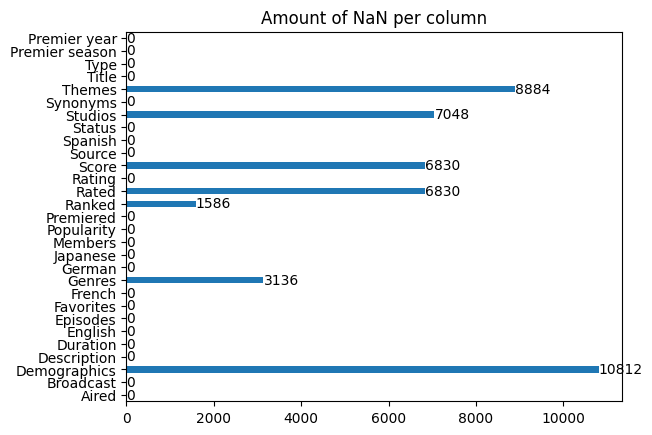

In [24]:
ax = pd.DataFrame([df_general[i].isnull().value_counts() for i in df_general.columns])[True].plot(kind="barh", title="Amount of NaN per column");
ax.bar_label(ax.containers[0]);

# Easy part - DONE!!!

Now there is a need to look deeply into what kind of information need to be generated for remaining data.
<strong style="color: red">Themes</strong>, 
<strong style="color: red">Genres</strong>, 
<strong style="color: red">Rating</strong> and 
<strong style="color: red">Demographics</strong> are dependent on one another. 
<strong style="color: blue">Studios</strong> are dependent on complete information of that data. And
<strong style="color: blue">Producers</strong> with
<strong style="color: blue">Licensors</strong> should be dependent on Studios. As for 
<strong style="color: brown">Score</strong> and 
<strong style="color: brown">Rated</strong> they are linerly dependent on one another. There is also some relation between them and
<strong style="color: gray">Populiarity</strong>,
<strong style="color: gray">Members</strong>,
<strong style="color: gray">Favorites</strong> and very strong dependency on
<strong style="color: olive">Ranked</strong>. 

# Themes, Genres and Demographics data enrichment

### Lots of NaNs on Themes, Genres and Demographics. Need to check amount of Animes that don't have any at all

Amount of NaNs.

    0 - Every piece of information specified is present
    3 - No information at all

In [25]:
((df_general["Genres"].isnull().astype("int64") + df_general["Themes"].isnull() + df_general["Demographics"].isnull())).sort_values().value_counts().sort_index()

0    3396
1    8696
2    6981
3      58
dtype: int64

#### Take a look at Demographics and Rating to see if there is any need for data cleaning

In [26]:
print("Demographics: ", df_general["Demographics"].unique())
print("Rating: ", df_general["Rating"].unique())

Demographics:  ['Shounen' nan 'Seinen' 'Shoujo' 'Josei' 'Kids' 'Kids, Shounen'
 'Kids, Shoujo']
Rating:  ['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'R+ - Mild Nudity' 'PG - Children' 'G - All Ages' 'None' 'Rx - Hentai']


In [27]:
df_general["Demographics"].value_counts()

Kids             4872
Shounen          1829
Seinen            821
Shoujo            618
Josei              98
Kids, Shounen      52
Kids, Shoujo       29
Name: Demographics, dtype: int64

#### Demographics have 2 kind of unnecesary values [Kids, Shounen], [Kids, Shoujo]. Clean it up

In [28]:
df_general["Demographics"] = df_general["Demographics"].apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)

In [29]:
print("Demographics: ", df_general["Demographics"].unique())
print("Rating: ", df_general["Rating"].unique())

Demographics:  ['Shounen' nan 'Seinen' 'Shoujo' 'Josei' 'Kids']
Rating:  ['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'R+ - Mild Nudity' 'PG - Children' 'G - All Ages' 'None' 'Rx - Hentai']


#### Check how dependent Demographics on Rating

In [30]:
for i in df_general["Demographics"].unique():
    print(f"{i}:\n", df_general[["Demographics", "Rating"]].where(df_general["Demographics"] == i).dropna()["Rating"].value_counts(), "\n")

Shounen:
 PG-13 - Teens 13 or older         1234
R - 17+ (violence & profanity)     252
G - All Ages                       134
R+ - Mild Nudity                   123
PG - Children                       57
None                                29
Name: Rating, dtype: int64 

nan:
 Series([], Name: Rating, dtype: int64) 

Seinen:
 PG-13 - Teens 13 or older         421
R - 17+ (violence & profanity)    147
R+ - Mild Nudity                  136
G - All Ages                       85
None                               28
PG - Children                       4
Name: Rating, dtype: int64 

Shoujo:
 PG-13 - Teens 13 or older         302
G - All Ages                      195
PG - Children                      83
R - 17+ (violence & profanity)     21
R+ - Mild Nudity                   11
None                                6
Name: Rating, dtype: int64 

Josei:
 PG-13 - Teens 13 or older         69
R - 17+ (violence & profanity)    12
G - All Ages                       9
None                         

#### There is a strong dependency but it is not enough to add missing data in Demographics column only based on Rating. Let's add Themes and Genres to it

In [31]:
df_general[["Demographics", "Rating", "Themes", "Genres"]].head(5)

,Demographics,Rating,Themes,Genres
0,Shounen,R - 17+ (violence & profanity),NaN,"Action, Adventure, Fantasy"
1,NaN,R - 17+ (violence & profanity),Vampire,"Action, Mystery, Supernatural"
2,Shounen,R - 17+ (violence & profanity),"Gore, Military, Survival","Action, Drama"
3,NaN,PG-13 - Teens 13 or older,Super Power,"Action, Comedy, Supernatural"
4,Shounen,PG-13 - Teens 13 or older,"Gag Humor, Historical, Parody, Samurai","Action, Comedy, Sci-Fi"


In [32]:
genres = set()
themes = set()
demographics = [i for i in df_general["Demographics"].unique() if isinstance(i, str)]
ratings = [i for i in df_general["Rating"].unique()]
for genre, theme in zip(df_general["Genres"], df_general["Themes"]):
    if isinstance(genre, str):
        for j in genre.split(", "):
            genres.add(j)
    if isinstance(theme, str):
        for j in theme.split(", "):
            themes.add(j)
genres, themes = list(genres), list(themes)

In [33]:
print(f"THEMES\n{themes}\n\n")
print(f"GENRES\n{genres}\n\n")
print(f"DEMOGRAPHICS\n{demographics}\n\n")

print(f"RATINGS\n{ratings}")

THEMES
['Mecha', 'Military', 'Time Travel', 'Reverse Harem', 'Racing', 'Gore', 'Samurai', 'CGDCT', 'Team Sports', 'Medical', 'Performing Arts', 'Super Power', 'Crossdressing', 'Mythology', 'Delinquents', 'Parody', 'Workplace', 'School', 'Visual Arts', 'Combat Sports', 'Anthropomorphic', 'Childcare', 'Harem', 'Reincarnation', 'Gag Humor', 'Idols (Female)', 'Romantic Subtext', 'Vampire', 'Music', 'Idols (Male)', 'Iyashikei', 'Love Polygon', 'Psychological', 'Detective', 'Historical', 'Space', 'Organized Crime', 'Showbiz', 'High Stakes Game', 'Survival', 'Educational', 'Otaku Culture', 'Martial Arts', 'Strategy Game', 'Pets', 'Magical Sex Shift', 'Adult Cast', 'Isekai', 'Mahou Shoujo', 'Video Game']


GENRES
['Award Winning', 'Adventure', 'Sci-Fi', 'Avant Garde', 'Mystery', 'Hentai', 'Romance', 'Erotica', 'Comedy', 'Sports', 'Gourmet', 'Action', 'Boys Love', 'Supernatural', 'Drama', 'Suspense', 'Slice of Life', 'Fantasy', 'Horror', 'Girls Love', 'Ecchi']


DEMOGRAPHICS
['Shounen', 'Seinen

# There is not much data, but it is enough to make crude predictions using classification algorithms.

In [34]:
#ADD DESC and title, langs - Mission Failed
KNN_Imputer_data = df_general[["Demographics", "Rating", "Genres", "Themes"]]
KNN_data = df_general[["Demographics", "Rating", "Genres", "Themes"]].dropna()

In [35]:
top_genres = {}
for genre in genres:
    #print(f"{genre}\n{(df_general['Genres'].str.find(genre) > -1).value_counts()}\n\n")
    top_genres.update({genre: (df_general['Genres'].str.find(genre) > -1).value_counts()[True]})
top_genres = pd.Series(top_genres).sort_values(ascending=False)

In [36]:
top_themes = {}
for theme in themes:
    #print(f"{genre}\n{(df_general['Genres'].str.find(genre) > -1).value_counts()}\n\n")
    top_themes.update({theme: (df_general['Themes'].str.find(theme) > -1).value_counts()[True]})
top_themes = pd.Series(top_themes).sort_values(ascending=False)

In [37]:
knnImputer = KNNImputer(n_neighbors=1)
X_transformed = KNN_Imputer_data.drop("Demographics", axis="columns")
X = KNN_data.drop("Demographics", axis="columns")
y = KNN_data["Demographics"]
for item, column in zip([genres, themes, ratings], ["Genres", "Themes", "Rating"]):
    for data in item:
        X_transformed[data] = X_transformed[column].isnull().apply(lambda x: x if x != 1 else np.NaN)
        X_transformed[data] += (X_transformed[column].str.find(data) > -1).astype("int64")
        X[data] = (X[column].str.find(data) > -1).astype("int64")
    X_transformed.drop(column, axis="columns", inplace=True)
    X.drop(column, axis="columns", inplace=True)
for i, item in enumerate(demographics):
    y = y.apply(lambda x: i if x == item else x)
X_transformed = knnImputer.fit_transform(X_transformed)

## Data is processed. Start training model

In [38]:
knn = KNeighborsClassifier(n_neighbors=1, metric="cosine")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8205882352941176



82.1% is not much. But it is enough for our needs

In [39]:
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

KNNImputer can make assumptions about data with NaNs and replace them with predicted values

In [40]:
for index in df_general.index:
    genre = ""
    theme = ""
    for item in X_transformed.T[index].where(X_transformed.T[index] == 1).dropna().index:
        if item in genres:
            genre += item + ", "
        if item in themes:
            theme += item + ", "
    genre = genre[:-2]
    theme = theme[:-2]
    df_general["Genres"][index], df_general["Themes"][index] = genre, theme

In [41]:
X_change = df_general[["Genres", "Themes", "Rating"]].dropna()
for item, column in zip([genres, themes, ratings], ["Genres", "Themes", "Rating"]):
    for data in item:
        X_change[data] = (X_change[column].str.find(data) > -1).astype("int64")
    X_change.drop(column, axis="columns", inplace=True)
for index, demographic in zip(X_change.index, knn.predict(X_change)):
    df_general["Demographics"][index] = demographics[demographic]

Amount of NaNs.

    0 - Every piece of information specified is present
    3 - No information at all

In [42]:
((df_general["Genres"].isnull().astype("int64") + df_general["Themes"].isnull() + df_general["Demographics"].isnull())).sort_values().value_counts().sort_index()

0    19131
dtype: int64

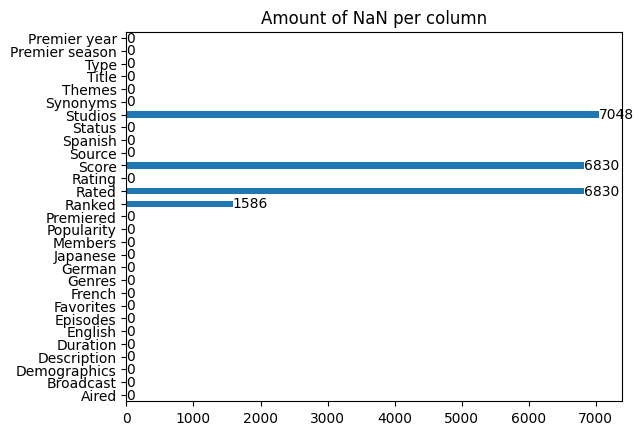

In [43]:
ax = pd.DataFrame([df_general[i].isnull().value_counts() for i in df_general.columns])[True].plot(kind="barh", title="Amount of NaN per column");
ax.bar_label(ax.containers[0]);

# Now it is time for Studios, Licensors and Producers.

In [44]:
studios = set()
for item in df_general["Studios"].dropna():
    for studio in item.split(", "):
        studios.add(studio)
studios = list(studios)

In [45]:
KNN_Imputer_data = df_general[["Demographics", "Genres", "Themes", "Rating", "Studios"]]
knnImputer = KNNImputer(n_neighbors=1)
X_transformed = KNN_Imputer_data.copy()
for item, column in zip([demographics, genres, themes, ratings, studios], 
                        ["Demographics", "Genres", "Themes", "Rating", "Studios"]):
    for data in item:
        X_transformed[data] = X_transformed[column].isnull().apply(lambda x: x if x != 1 else np.NaN)
        X_transformed[data] += (X_transformed[column].str.find(data) > -1).astype("int64")
    X_transformed.drop(column, axis="columns", inplace=True)
columns = X_transformed.columns

In [46]:
X_transformed = knnImputer.fit_transform(X_transformed)
X_transformed = pd.DataFrame(X_transformed, columns=columns)

In [47]:
for index in df_general.index:
    studio = ""
    for item in X_transformed.T[index].where(X_transformed.T[index] == 1).dropna().index:
        if item in studios:
            studio += item + ", "
    studio = studio[:-2]
    df_general["Studios"][index] = studio

In [48]:
df_general.to_csv("Anime_df_first_revision.csv")

In [121]:
df_general = pd.read_csv("Anime_df_first_revision.csv")
df_general.drop("Unnamed: 0", axis="columns", inplace=True)

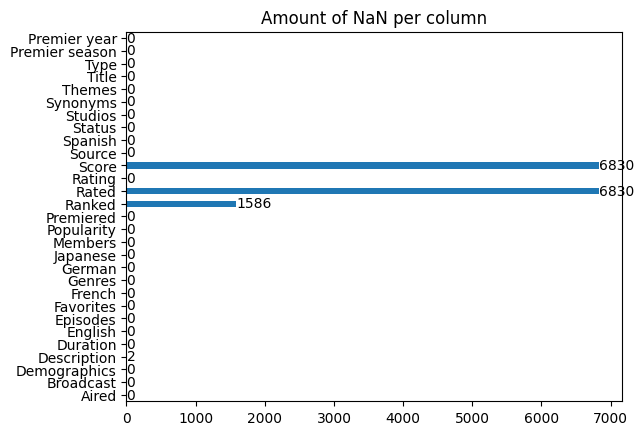

In [122]:
ax = pd.DataFrame([df_general[i].isnull().value_counts() for i in df_general.columns])[True].plot(kind="barh", title="Amount of NaN per column");
ax.bar_label(ax.containers[0]);

In [123]:
df_general["Ranked"] = df_general["Ranked"].apply(lambda x: df_general["Ranked"].max()-x+1)
df_general["Popularity"] = df_general["Popularity"].apply(lambda x: df_general["Popularity"].max()-x+1)

In [124]:
df_general[["Rated", "Favorites", "Members", "Popularity", "Ranked", "Score"]].sort_values("Favorites", ascending=False).dropna().corr().style.background_gradient(cmap='coolwarm')

,Rated,Favorites,Members,Popularity,Ranked,Score
Rated,1.000000,0.255086,0.400107,0.658629,0.978269,0.361640
Favorites,0.255086,1.000000,0.776209,0.206478,0.202022,0.785737
Members,0.400107,0.776209,1.000000,0.446680,0.361291,0.989026
Popularity,0.658629,0.206478,0.446680,1.000000,0.683540,0.392969
Ranked,0.978269,0.202022,0.361291,0.683540,1.000000,0.323310
Score,0.361640,0.785737,0.989026,0.392969,0.323310,1.000000


In [125]:
df_general["Popularity"]

0        22684
1        22931
2        23349
3        23311
4        22301
         ...  
19126     6581
19127     9877
19128     3502
19129     3194
19130    12614
Name: Popularity, Length: 19131, dtype: int64

In [126]:
df_general[["Rated", "Popularity", "Ranked"]].sort_values("Ranked", ascending=False)

,Rated,Popularity,Ranked
0,9.12,22684,21457.0
30,9.11,23387,21456.0
29,9.09,23150,21455.0
28,9.08,23377,21454.0
27,9.07,23052,21453.0
...,...,...,...
19126,NaN,6581,NaN
19127,NaN,9877,NaN
19128,NaN,3502,NaN
19129,NaN,3194,NaN


In [127]:
df_general.columns

Index(['Aired', 'Broadcast', 'Demographics', 'Description', 'Duration',
       'English', 'Episodes', 'Favorites', 'French', 'Genres', 'German',
       'Japanese', 'Members', 'Popularity', 'Premiered', 'Ranked', 'Rated',
       'Rating', 'Score', 'Source', 'Spanish', 'Status', 'Studios', 'Synonyms',
       'Themes', 'Title', 'Type', 'Premier season', 'Premier year'],
      dtype='object')

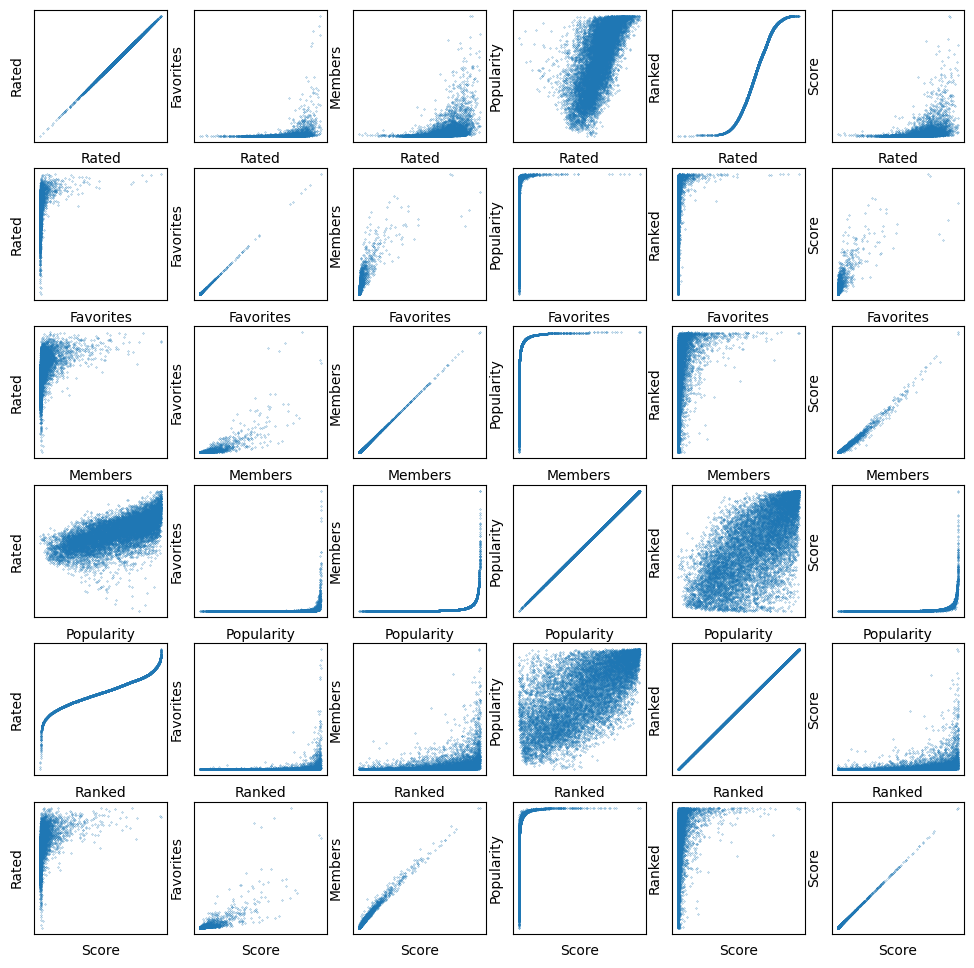

In [128]:
fig, axs = plt.subplots(6, 6, figsize=(12, 12))
axs = axs.ravel()
df_plot = df_general[["Rated", "Favorites", "Members", "Popularity", "Ranked", "Score"]].dropna()
index_x_y = 0
for x in df_plot.columns:
    for y in df_plot.columns:
        df_plot.plot(ax=axs[index_x_y], kind="scatter", x=x, y=y, s=0.05, xticks=[], yticks=[])
        index_x_y += 1

In [129]:
df_plot["Rated"]

0        9.12
1        8.80
2        8.81
3        8.81
4        8.81
         ... 
11107    2.91
11108    2.97
11109    2.99
11110    3.04
11111    3.09
Name: Rated, Length: 11108, dtype: float64

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [131]:
X = df_plot.drop(["Rated", "Score"], axis="columns")
y = df_plot["Rated"]

In [132]:
#degrees = [1, 2, 3, 6, 9, 12, 15]
degrees = [1, 2, 3, 12]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=0)
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    lm = LinearRegression()
    lm.fit(X_train, y_train);
    print(f"Polynomial degree: {degree}\n\n"
          f"TRAIN SCORE\n"
          f"Lasso: {lasso.score(X_train, y_train)}\n"
          f"Ridge: {ridge.score(X_train, y_train)}\n"
          f"LinearRegression (no reg.): {lm.score(X_train, y_train)}\n"
          f"\nTEST SCORE\n"
          f"Lasso: {lasso.score(X_test, y_test)}\n"
          f"Ridge: {ridge.score(X_test, y_test)}\n"
          f"LinearRegression (no reg.): {lm.score(X_test, y_test)}\n")

Polynomial degree: 1

TRAIN SCORE
Lasso: 0.9593426975621685
Ridge: 0.9593432482208287
LinearRegression (no reg.): 0.9593432482208287

TEST SCORE
Lasso: 0.9683897782985293
Ridge: 0.9683768663168221
LinearRegression (no reg.): 0.9683768663165315

Polynomial degree: 2

TRAIN SCORE
Lasso: 0.9631497411331643
Ridge: 0.9652921091788826
LinearRegression (no reg.): 0.9652921091788794

TEST SCORE
Lasso: 0.9722502032579272
Ridge: 0.9739380100473766
LinearRegression (no reg.): 0.9739380088071546

Polynomial degree: 3

TRAIN SCORE
Lasso: 0.9656906783631768
Ridge: 0.9859600374832468
LinearRegression (no reg.): 0.969615496724253

TEST SCORE
Lasso: 0.9745250380556724
Ridge: 0.9907197123374513
LinearRegression (no reg.): 0.9771024455020276

Polynomial degree: 12

TRAIN SCORE
Lasso: 0.9818154172693385
Ridge: -2.139673562836965
LinearRegression (no reg.): -5.64817640775178

TEST SCORE
Lasso: 0.9892630446652861
Ridge: -9525.870884771308
LinearRegression (no reg.): -88707.7231518389



In [133]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=0)
lasso = Lasso()
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test))

0.9892630446652861


In [134]:
X_predict = df_general[["Favorites", "Members", "Popularity", "Ranked"]].where(df_general["Rated"].isnull() == True).dropna()
index = df_general[["Favorites", "Members", "Popularity", "Ranked"]].where(df_general["Rated"].isnull() == True).dropna().index
X_predict = poly.fit_transform(X_predict)
predicted_rated = round(pd.Series(lasso.predict(X_predict)), 2)

In [135]:
df_general["Rated"][index] = predicted_rated

In [136]:
y = df_plot["Score"]

In [137]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=0)
lasso = Lasso()
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test))

0.9917822988818992


In [138]:
X_predict = df_general[["Favorites", "Members", "Popularity", "Ranked"]].where(df_general["Score"].isnull() == True).dropna()
index = df_general[["Favorites", "Members", "Popularity", "Ranked"]].where(df_general["Score"].isnull() == True).dropna().index
X_predict = poly.fit_transform(X_predict)
predicted_rated = abs(round(pd.Series(lasso.predict(X_predict))))

In [139]:
df_general["Score"][index] = predicted_rated

In [140]:
df_general.shape[0] - df_general[["Score", "Rated"]].dropna().shape[0]

393

In [141]:
df_general.iloc[17542]

Aired                                                 Not available
Broadcast                                          One time release
Demographics                                                Shounen
Description       A cultivation story about how a declining sect...
Duration                                                         24
English                                                  No English
Episodes                                                    Unknown
Favorites                                                        15
French                                                    No French
Genres                                 Supernatural, Drama, Fantasy
German                                                    No German
Japanese                                                         六爻
Members                                                        2453
Popularity                                                    13727
Premiered                                       

In [142]:
df_general.drop(df_general["Score"].sort_values()[-393:].index, inplace=True)

In [143]:
df_general

,Aired,Broadcast,Demographics,Description,Duration,English,Episodes,Favorites,French,Genres,...,Source,Spanish,Status,Studios,Synonyms,Themes,Title,Type,Premier season,Premier year
0,"Oct 11, 2022 to ?",Tuesdays at 00:00 (JST),Shounen,Substitute Soul Reaper Ichigo Kurosaki spends ...,24,Bleach: Thousand-Year Blood War,13,10841,No French,"Adventure, Action, Fantasy",...,Manga,No Spanish,Currently Airing,Pierrot,Bleach: Thousand-Year Blood War Arc,Vampire,Bleach: Sennen Kessen-hen,TV,Fall,2022
1,"Jan 6, 2017",One time release,Shounen,After helping revive the legendary vampire Kis...,83,Kizumonogatari Part 3: Cold-Blooded,1,7038,Kizumonogatari Partie 3: Sang Glacial,"Mystery, Action, Supernatural",...,Light novel,No Spanish,Finished Airing,Shaft,Koyomi Vamp,Vampire,Kizumonogatari III: Reiketsu-hen,Movie,Winter,2017
2,"Dec 7, 2020 to Mar 29, 2021",Mondays at 00:10 (JST),Shounen,Gabi Braun and Falco Grice have been training ...,23,Attack on Titan: The Final Season,16,50452,L'Attaque des Titans Saison Finale,"Action, Drama",...,Manga,Ataque a los Titanes Temporada Final,Finished Airing,MAPPA,"Shingeki no Kyojin Season 4, Attack on Titan S...","Military, Gore, Survival",Shingeki no Kyojin: The Final Season,TV,Winter,2021
3,"Jan 7, 2019 to Apr 1, 2019",Mondays at 23:00 (JST),Shounen,"Shigeo ""Mob"" Kageyama is now maturing and unde...",24,Mob Psycho 100 II,13,30840,No French,"Comedy, Action, Supernatural",...,Web manga,No Spanish,Finished Airing,Bones,"Mob Psycho 100 2nd Season, Mob Psycho Hyaku, M...",Super Power,Mob Psycho 100 II,TV,Winter,2019
4,"Jan 8, 2018 to Mar 26, 2018",Mondays at 01:35 (JST),Shounen,"After the fierce battle on Rakuyou, the untold...",24,Gintama.: Silver Soul Arc,12,1103,No French,"Sci-Fi, Comedy, Action",...,Manga,No Spanish,Finished Airing,Bandai Namco Pictures,Gintama.: Shirogane no Tamashii-hen,"Samurai, Parody, Gag Humor, Historical",Gintama.: Shirogane no Tamashii-hen,TV,Winter,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19117,"Nov 5, 1994",One time release,Shounen,"In the era of Chosun Dynasty (Old Korea), a Sw...",74,Blue Seagull,1,1,No French,"Hentai, Action",...,Unknown,No Spanish,Finished Airing,"Studio G-1Neo, Front Line",Beullu sigeol,Mythology,Blue Seagull,Movie,Fall,1994
19118,"Jul 27, 2001",One time release,Shounen,Manami will prove that she is the best ESP fig...,22,Sexy Fighter Manami,1,1,No French,Hentai,...,Unknown,No Spanish,Finished Airing,T-Rex,Esper Bishoujo Manami,Harem,Esper Bishoujo Manami,OVA,Summer,2001
19119,"Sep 7, 2006",One time release,Shounen,Upbeat and effeminate Pico is working at his g...,32,No English,1,1680,No French,"Hentai, Boys Love",...,Original,No Spanish,Finished Airing,"Blue Cat, Sugar Boy","Boku no Piko, My Pico, Boku no Pico OVA 1 - My...",Harem,Boku no Pico,OVA,Fall,2006
19120,"Dec 21, 2001",One time release,Shounen,Under the uniforms of this girls volleyball te...,19,Girl's Locker Room Lust,1,1,No French,Hentai,...,Original,No Spanish,Finished Airing,T-Rex,Mini Skirt Jogakuen,Harem,Mini Skirt Gakuen,OVA,Winter,2001


In [144]:
df_general["Score"].isnull().where(df_general["Score"].isnull() == True).dropna().index

Int64Index([], dtype='int64')

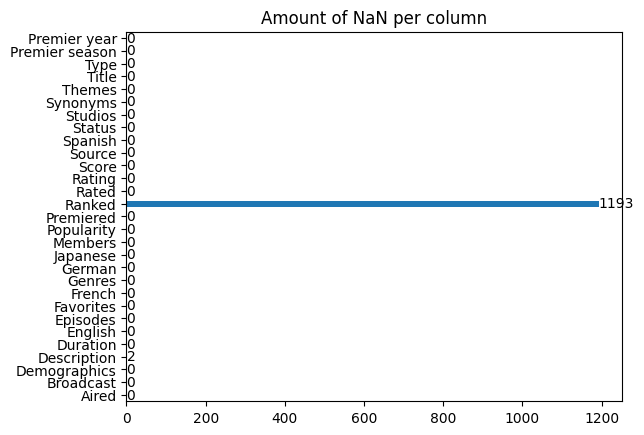

In [145]:
ax = pd.DataFrame([df_general[i].isnull().value_counts() for i in df_general.columns])[True].plot(kind="barh", title="Amount of NaN per column");
ax.bar_label(ax.containers[0]);

In [146]:
df_general["Rated"].isnull().where(df_general["Rated"].isnull() == True).dropna()

Series([], Name: Rated, dtype: object)

In [147]:
df_general = df_general.sort_values(by="Rated", ascending=False)
df_general["Ranked"] = np.linspace(1, 18738, 18738)

In [148]:
df_general

,Aired,Broadcast,Demographics,Description,Duration,English,Episodes,Favorites,French,Genres,...,Source,Spanish,Status,Studios,Synonyms,Themes,Title,Type,Premier season,Premier year
0,"Oct 11, 2022 to ?",Tuesdays at 00:00 (JST),Shounen,Substitute Soul Reaper Ichigo Kurosaki spends ...,24,Bleach: Thousand-Year Blood War,13,10841,No French,"Adventure, Action, Fantasy",...,Manga,No Spanish,Currently Airing,Pierrot,Bleach: Thousand-Year Blood War Arc,Vampire,Bleach: Sennen Kessen-hen,TV,Fall,2022
30,"Apr 5, 2009 to Jul 4, 2010",Sundays at 17:00 (JST),Shounen,After a horrific alchemy experiment goes wrong...,24,Fullmetal Alchemist: Brotherhood,64,210487,Fullmetal Alchemist Brotherhood,"Adventure, Action, Drama, Fantasy",...,Manga,No Spanish,Finished Airing,Bones,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",Military,Fullmetal Alchemist: Brotherhood,TV,Spring,2009
29,"Apr 9, 2022 to Jun 25, 2022",Saturdays at 00:00 (JST),Shounen,The elite members of Shuchiin Academy's studen...,23,Kaguya-sama: Love is War - Ultra Romantic,13,25657,No French,"Romance, Comedy",...,Manga,No Spanish,Finished Airing,A-1 Pictures,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,"School, Psychological",Kaguya-sama wa Kokurasetai: Ultra Romantic,TV,Spring,2022
28,"Apr 6, 2011 to Sep 14, 2011",Wednesdays at 02:05 (JST),Shounen,Eccentric scientist Rintarou Okabe has a never...,24,Steins;Gate,24,177026,No French,"Sci-Fi, Drama, Suspense",...,Visual novel,No Spanish,Finished Airing,White Fox,Steins;Gate,"Time Travel, Psychological",Steins;Gate,TV,Spring,2011
27,"Apr 8, 2015 to Mar 30, 2016",Wednesdays at 18:00 (JST),Shounen,"Gintoki, Shinpachi, and Kagura return as the f...",24,Gintama Season 4,51,15273,Gintama Saison 4,"Sci-Fi, Comedy, Action",...,Manga,Gintama Temporada 4,Finished Airing,Bandai Namco Pictures,Gintama' (2015),"Samurai, Parody, Gag Humor, Historical",Gintama°,TV,Spring,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17476,"Oct 21, 2022",One time release,Shounen,"Once upon a time, there were two rival kingdom...",24,Gold Kingdom and Water Kingdom,1,2,No French,"Romance, Fantasy",...,Manga,No Spanish,Finished Airing,Madhouse,Kin no Kuni Mizu no Kuni,"Performing Arts, School, Music",Kin no Kuni Mizu no Kuni,Movie,Fall,2022
17004,"Nov 25, 2022 to Dec 23, 2022",One time release,Seinen,No synopsis information has been added to this...,4,No English,2,44,No French,"Comedy, Ecchi",...,Light novel,No Spanish,Currently Airing,Passione,Isekai Meikyuu de Harem wo Specials,"School, Gag Humor",Isekai Meikyuu de Harem wo Specials,Special,Fall,2022
17353,"Oct 26, 2022 to Jan 25, 2023",One time release,Shounen,Mini anime shorts included in each of the four...,1,Rent-a-Girlfriend 2nd Season Mini Anime,4,18,No French,Comedy,...,Manga,No Spanish,Currently Airing,TMS Entertainment,"Kanojo, Okarishimasu 2nd Season Specials","CGDCT, Music","Kanojo, Okarishimasu 2nd Season Mini Anime",Special,Fall,2022
17497,"Aug 11, 2017 to Mar 12, 2018",One time release,Kids,is a mobile fantasy RPG using characters from...,1,Kirara Fantasia,13,5,No French,Fantasy,...,Other,No Spanish,Finished Airing,Studio PuYUKAI,"Youkoso! Kirara Fantasia: New Game!-hen, Youko...",Music,Kirara Fantasia,ONA,Summer,2017


In [149]:
df_general.T[11100].T

Aired                                                   Dec 8, 2004
Broadcast                                          One time release
Demographics                                                Shounen
Description       When a mysterious entity suddenly appears in t...
Duration                                                         19
English                                              Skelter Heaven
Episodes                                                          1
Favorites                                                       109
French                                                    No French
Genres                                                       Sci-Fi
German                                                    No German
Japanese                                               天空断罪スケルターヘブン
Members                                                       35823
Popularity                                                    20070
Premiered                                       

In [150]:
df_general[["Rated", "Ranked"]].sort_values("Ranked")

,Rated,Ranked
0,9.12,1.0
30,9.11,2.0
29,9.09,3.0
28,9.08,4.0
27,9.07,5.0
...,...,...
17476,0.82,18734.0
17004,0.80,18735.0
17353,0.77,18736.0
17497,0.76,18737.0


In [151]:
df_general["Description"].fillna("", inplace=True)

In [152]:
df_general

,Aired,Broadcast,Demographics,Description,Duration,English,Episodes,Favorites,French,Genres,...,Source,Spanish,Status,Studios,Synonyms,Themes,Title,Type,Premier season,Premier year
0,"Oct 11, 2022 to ?",Tuesdays at 00:00 (JST),Shounen,Substitute Soul Reaper Ichigo Kurosaki spends ...,24,Bleach: Thousand-Year Blood War,13,10841,No French,"Adventure, Action, Fantasy",...,Manga,No Spanish,Currently Airing,Pierrot,Bleach: Thousand-Year Blood War Arc,Vampire,Bleach: Sennen Kessen-hen,TV,Fall,2022
30,"Apr 5, 2009 to Jul 4, 2010",Sundays at 17:00 (JST),Shounen,After a horrific alchemy experiment goes wrong...,24,Fullmetal Alchemist: Brotherhood,64,210487,Fullmetal Alchemist Brotherhood,"Adventure, Action, Drama, Fantasy",...,Manga,No Spanish,Finished Airing,Bones,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",Military,Fullmetal Alchemist: Brotherhood,TV,Spring,2009
29,"Apr 9, 2022 to Jun 25, 2022",Saturdays at 00:00 (JST),Shounen,The elite members of Shuchiin Academy's studen...,23,Kaguya-sama: Love is War - Ultra Romantic,13,25657,No French,"Romance, Comedy",...,Manga,No Spanish,Finished Airing,A-1 Pictures,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,"School, Psychological",Kaguya-sama wa Kokurasetai: Ultra Romantic,TV,Spring,2022
28,"Apr 6, 2011 to Sep 14, 2011",Wednesdays at 02:05 (JST),Shounen,Eccentric scientist Rintarou Okabe has a never...,24,Steins;Gate,24,177026,No French,"Sci-Fi, Drama, Suspense",...,Visual novel,No Spanish,Finished Airing,White Fox,Steins;Gate,"Time Travel, Psychological",Steins;Gate,TV,Spring,2011
27,"Apr 8, 2015 to Mar 30, 2016",Wednesdays at 18:00 (JST),Shounen,"Gintoki, Shinpachi, and Kagura return as the f...",24,Gintama Season 4,51,15273,Gintama Saison 4,"Sci-Fi, Comedy, Action",...,Manga,Gintama Temporada 4,Finished Airing,Bandai Namco Pictures,Gintama' (2015),"Samurai, Parody, Gag Humor, Historical",Gintama°,TV,Spring,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17476,"Oct 21, 2022",One time release,Shounen,"Once upon a time, there were two rival kingdom...",24,Gold Kingdom and Water Kingdom,1,2,No French,"Romance, Fantasy",...,Manga,No Spanish,Finished Airing,Madhouse,Kin no Kuni Mizu no Kuni,"Performing Arts, School, Music",Kin no Kuni Mizu no Kuni,Movie,Fall,2022
17004,"Nov 25, 2022 to Dec 23, 2022",One time release,Seinen,No synopsis information has been added to this...,4,No English,2,44,No French,"Comedy, Ecchi",...,Light novel,No Spanish,Currently Airing,Passione,Isekai Meikyuu de Harem wo Specials,"School, Gag Humor",Isekai Meikyuu de Harem wo Specials,Special,Fall,2022
17353,"Oct 26, 2022 to Jan 25, 2023",One time release,Shounen,Mini anime shorts included in each of the four...,1,Rent-a-Girlfriend 2nd Season Mini Anime,4,18,No French,Comedy,...,Manga,No Spanish,Currently Airing,TMS Entertainment,"Kanojo, Okarishimasu 2nd Season Specials","CGDCT, Music","Kanojo, Okarishimasu 2nd Season Mini Anime",Special,Fall,2022
17497,"Aug 11, 2017 to Mar 12, 2018",One time release,Kids,is a mobile fantasy RPG using characters from...,1,Kirara Fantasia,13,5,No French,Fantasy,...,Other,No Spanish,Finished Airing,Studio PuYUKAI,"Youkoso! Kirara Fantasia: New Game!-hen, Youko...",Music,Kirara Fantasia,ONA,Summer,2017


In [155]:
df_general.columns

Index(['Aired', 'Broadcast', 'Demographics', 'Description', 'Duration',
       'English', 'Episodes', 'Favorites', 'French', 'Genres', 'German',
       'Japanese', 'Members', 'Popularity', 'Premiered', 'Ranked', 'Rated',
       'Rating', 'Score', 'Source', 'Spanish', 'Status', 'Studios', 'Synonyms',
       'Themes', 'Title', 'Type', 'Premier season', 'Premier year'],
      dtype='object')

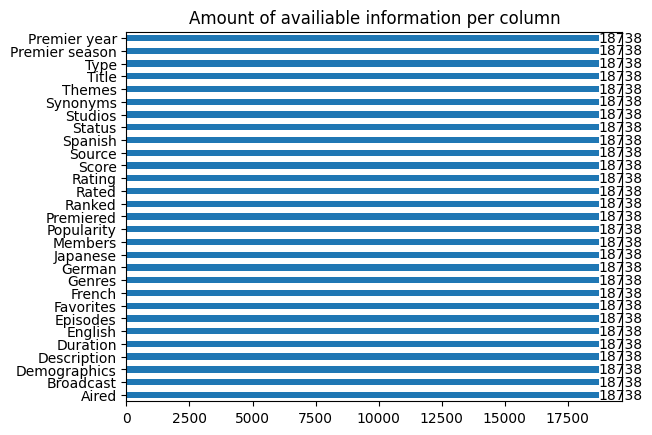

In [160]:
ax = pd.DataFrame([df_general[i].isnull().value_counts() for i in df_general.columns]).plot(kind="barh", title="Amount of availiable information per column", legend=False);
ax.bar_label(ax.containers[0]);

In [161]:
df_general.to_csv("Anime_general_complete.csv")

Lets break down every column that we have   

***
***COLUMNS SPECIFY***
>__NAME__
>>1. Title in different languages
>>> - English   
>>> - French    
>>> - German  
>>> - Japanese   
>>> - Spanish   
>>
>>2. Alternative names
>>> - Synonyms   
>>
>>3. Title  
>
***
>__MOST GENERAL INFORMATION__
>> - Licensors ___(DELETED)___
>> - Producers ___(DELETED)___
>> - Status
>> - Studios
>> - Type
>> - Description  
>> - Source
>>> **EXPLAINED**    
What is the source of this item???   
Example: Manga
>> - Demographics  
>>> **EXPLAINED**  
Specify what kind of audience this item was originally made for.  
Example: Shounen  
This is one of the most popular types of manga and anime. It is usually combined with another genre, and since it is targeted at a young (teen) male audience, shounen series are often referred to as "boy's comics."
>> - Genres   
>> - Rating  
>> - Themes  
>>> **EXPLAINED**   
Specify main elements shown in item.   
Example: military   
It means that most action will be releated to military in one way or another
***
>__TIME__
>> - Aired  
>> - Broadcast  
>>> **EXPLAINED**  
Time when new series are going to be aired every week  
>> - Duration  
>> - Episodes  
>> - Premiered
***
>__AUDIENCE REACTION__
>> - Favorites
>>> **EXPLAINED**   
Amount of people that added item to their favorites
>> - Members
>>> **EXPLAINED**   
Amount of people that added item to their watch list
>> - Popularity
>>> **EXPLAINED**    
Most actively watched and rewatched items have this parameter lower
>> - Ranked
>>> **EXPLAINED**    
Items that have high Rated have this parameter low   
_Fact of the day:_   
If Rated is NaN. It is either not yet aired. Or it is hentai!
>> - Rated
>>> **EXPLAINED**   
Mean value that is calculated for item based on members thoughts about how good it is from 1 to 10
>> - Score
>>> **EXPLAINED**    
Amount of users that rated item
***